# Analysis of Brand Image on Instagram



Unsupervised & Supervised Learning Code 

Omar ALShaye, Matthew Rosenthal, Lisa Lee, 
Ann Eitrheim, Matthew Echols


# Unsupervised Learning

In this section, we conduct unsupervised learning techniques on our features to understand how many clusters are formed.We shall use only the numeric features in our dataset

In [4]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn
import pickle
from sklearn.cluster import KMeans

from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state
from sklearn.decomposition import PCA

In [5]:
data = pd.read_csv('data with appended Datetime.csv')

In [6]:
X = data[ ['Followers','Likes','MediaCount','Followings','Selfie','BodySnap','Marketing','ProductOnly','NonFashion','Face','Logo','BrandLogo','Smile','Outdoor','NumberOfPeople',
                'NumberOfFashionProduct','Anger','Contempt','Disgust','Fear','Happiness','Neutral', 'Sadness','Surprise']]

In [7]:
X.head()

,Followers,Likes,MediaCount,Followings,Selfie,BodySnap,Marketing,ProductOnly,NonFashion,Face,...,NumberOfPeople,NumberOfFashionProduct,Anger,Contempt,Disgust,Fear,Happiness,Neutral,Sadness,Surprise
0,9840.0,97,541,518.0,0.000885,0.336438,0.741220,0.009454,0.001827,0.839466,...,0.931486,3.42211,0.083862,0.015089,0.000583,0.000026,0.000017,0.890586,0.009657,0.000181
1,2300.0,94,272,7333.0,0.003912,0.995503,0.001728,0.002125,0.002438,0.480598,...,0.466329,2.91971,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,605.0,91,106,131.0,0.015774,0.963880,0.025719,0.027023,0.003409,0.283399,...,1.116500,4.69096,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,605.0,94,106,131.0,0.015774,0.963880,0.025719,0.027023,0.003409,0.283399,...,1.116500,4.69096,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,456.0,9,56,132.0,0.002021,0.014188,0.028351,0.418125,0.601519,0.010840,...,0.393063,1.45586,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [8]:
X = X.iloc[:,:].values #transforming to array 

In [9]:
X

array([[9.84000000e+03, 9.70000000e+01, 5.41000000e+02, ...,
        8.90585661e-01, 9.65670100e-03, 1.80998000e-04],
       [2.30000000e+03, 9.40000000e+01, 2.72000000e+02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [6.05000000e+02, 9.10000000e+01, 1.06000000e+02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [8.73700000e+03, 0.00000000e+00, 4.62540000e+04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [8.73700000e+03, 0.00000000e+00, 4.62540000e+04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.56300000e+03, 0.00000000e+00, 4.69000000e+02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [10]:
#Initializing KMeans with 4 clusters
kmeans = KMeans(n_clusters=4)
# Fitting with inputs
kmeans = kmeans.fit(X)
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_

From this chart, we really see two clusters here. Let us run an elbow plot

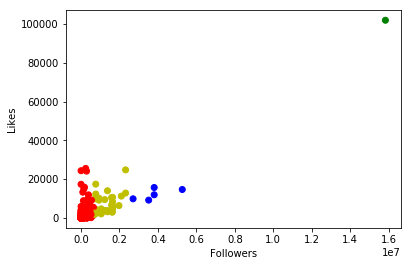

In [11]:
#plot
LABEL_COLOR_MAP = {0 : 'r', 1 : 'g', 2 : 'b',3 : 'y',4 : 'c', 5: 'm', 6: 'k'}
label_color = [LABEL_COLOR_MAP[l] for l in labels]
plt.scatter(X[:, 0], X[:, 1], c=label_color)

plt.xlabel("Followers")
plt.ylabel("Likes")
plt.show()

We see that it doesn't do a good job of seperating the classes

In [12]:
# Create a DataFrame with clusters and varieties as columns: df
BrandCategory = data['BrandCategory']
labels = kmeans.fit_predict(X)

df = pd.DataFrame({'labels': labels, 'BrandCategory': BrandCategory})

# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['BrandCategory'])

# Display ct
print(ct)

BrandCategory  Designer  High street  Mega couture  Small couture
labels                                                           
0                 11061         5770          1857           6025
1                     0            0             0              1
2                    20            3             0             10
3                     5            0             0              0


In [13]:
def cluster(array, random_state, n_clusters=4):
    '''
    Fits and predicts k-means clustering on "array"
    
    Parameters
    ----------
    array: A numpy array
    random_state: Random seed, e.g. check_random_state(0)
    n_clusters: The number of clusters. Default: 4
    
    Returns
    -------
    A tuple (sklearn.KMeans, np.ndarray)
    '''
    
    model = KMeans(n_clusters=n_clusters, random_state=check_random_state(0))
    clusters = model.fit_predict(array)
    
    return model, clusters

#here we return fitted (model) and predicted (clusters) arrays as a tuple

In [14]:
def plot_inertia(array, start=1, end=10):
    '''
    Increase the number of clusters from "start" to "end" (inclusive).
    Finds the inertia of k-means clustering for different k.
    Plots inertia as a function of the number of clusters.

    
    Parameters
    ----------
    array: A numpy array.
    start: An int. Default: 1
    end: An int. Default: 10
    
    Returns
    -------
    A matplotlib.Axes instance.
    '''
    #Your code is here
    
    x_axis = range(start, end+1)
    inertia = []

    for k in range(start, end+1):
    # Create a KMeans instance with k clusters: model
        model, cluster1 = cluster(array, random_state=check_random_state(0), n_clusters=k)
    

    
    # Append the inertia to the list of inertias
        inertia.append(model.inertia_)
    
    
    
    fig, ax = plt.subplots(figsize=(10,6))
    
    ax.set_title('The elbow method')
    ax.set_ylabel('Inertia')
    ax.set_xlabel('Number of clusters')
    plt.plot(x_axis, inertia)
    

    return ax

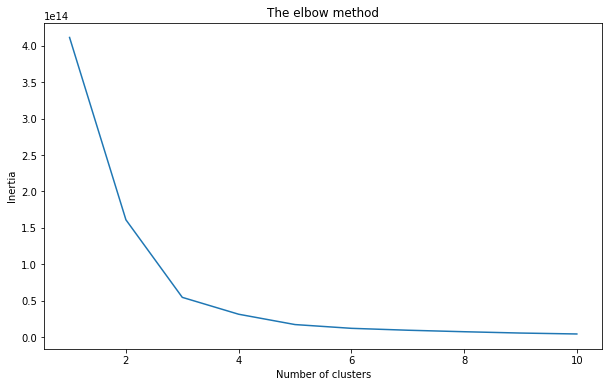

In [15]:
inertia = plot_inertia(X) #gives us two clusters 

In [16]:
#Initializing KMeans with 2 clusters
kmeans = KMeans(n_clusters=2)
# Fitting with inputs
kmeans = kmeans.fit(X)
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_

Followers and likes look to be highly correlated. A person with a huge number of followers will have a high number of likes. Should brands invest in these influencers? Not necessarily, this is because a popular influencer who has a high number of followers will have a high number of likes but this doesn't mean that the influencer's brand image aligns with the company's

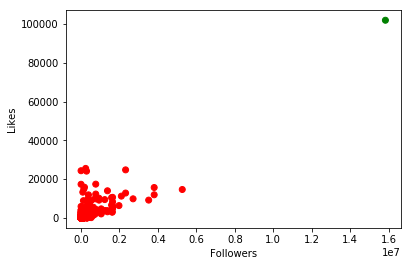

In [17]:
#plot
LABEL_COLOR_MAP = {0 : 'r', 1 : 'g', 2 : 'b',3 : 'y',4 : 'c', 5: 'm', 6: 'k'}
label_color = [LABEL_COLOR_MAP[l] for l in labels]
plt.scatter(X[:, 0], X[:, 1], c=label_color)

plt.xlabel("Followers")
plt.ylabel("Likes")
plt.show()

We shall confirm that

In [18]:
np.corrcoef(X[:, 0], X[:, 1])  #verified!

array([[1.        , 0.84535674],
       [0.84535674, 1.        ]])

In [19]:
# Create a DataFrame with clusters and varieties as columns: df
BrandCategory = data['BrandCategory']
labels = kmeans.fit_predict(X)

df = pd.DataFrame({'labels': labels, 'BrandCategory': BrandCategory})

# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['BrandCategory'])

# Display ct
print(ct)

BrandCategory  Designer  High street  Mega couture  Small couture
labels                                                           
0                 11086         5773          1857           6035
1                     0            0             0              1


In [20]:
X = data[ ['Followers','Likes','MediaCount','Followings','Selfie','BodySnap','Marketing','ProductOnly','NonFashion','Face','Logo','BrandLogo','Smile','Outdoor','NumberOfPeople',
                'NumberOfFashionProduct','Anger','Contempt','Disgust','Fear','Happiness','Neutral', 'Sadness','Surprise']]

In [21]:
X = X.iloc[:,:].values #transforming to array 

From this 3D visualization, we see that values for visual features (eg. happiness) are really high for the general population while visual features for the outlier is really low. With this insight, we have decided to fit our model using visual features in our data set to predict brand category.

Text(0.5, 0.92, 'KMeans on Numerical Variables')

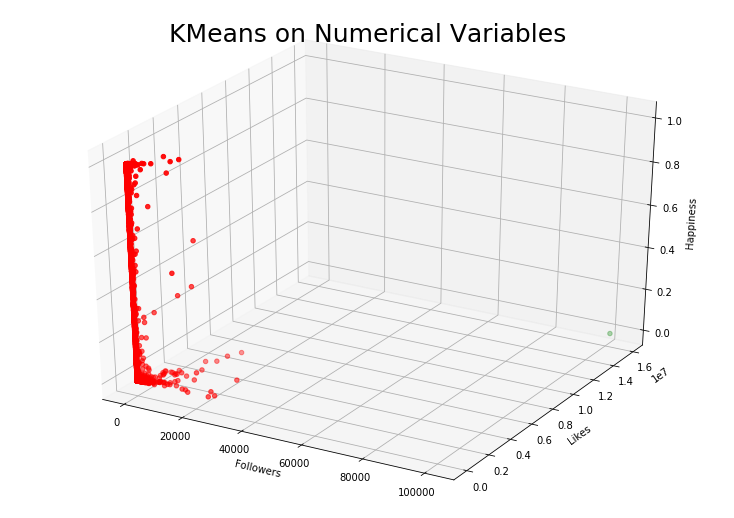

In [22]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,7))
ax = Axes3D(fig)
ax.scatter(X[:, 1], X[:, 0], X[:, 20], c=label_color)
#ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='o', c=['red','purple', 'green'], s=200)
ax.set_xlabel("Followers")
ax.set_ylabel("Likes")
ax.set_zlabel("Happiness")
ax.set_title("KMeans on Numerical Variables", fontsize=25)

# Attempts: Visualizing with TSNE

TSNE is incredibly flexible, and can often find structure where other dimensionality-reduction algorithms cannot. Unfortunately, that very flexibility makes it tricky to interpret.

In [23]:
tsneFeaturesemo = data[['Smile','Anger','Contempt','Disgust','Fear','Happiness','Neutral','Sadness','Surprise']]

In [24]:
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [25]:
scaler = StandardScaler()
scaler.fit(tsneFeaturesemo)
a_norm=scaler.transform(tsneFeaturesemo)

In [26]:
pca = PCA(n_components=3)  
X_pca = pca.fit_transform(a_norm)

In [27]:
X_tsneEmo = TSNE(learning_rate=100).fit_transform(X_pca)

In [28]:
dfemo = pd.DataFrame()
dfemo['xs'] = X_tsneEmo[:,0]
dfemo['ys'] = X_tsneEmo[:,1]
dfemo['BrandCategory'] = data['BrandCategory']

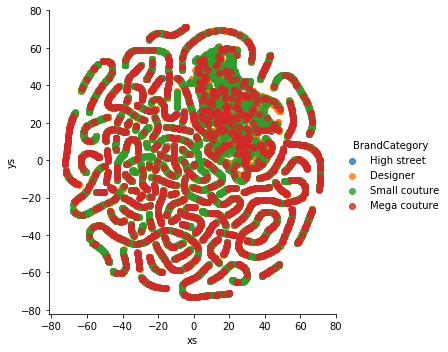

In [29]:
sns.lmplot('xs', 'ys', hue = 'BrandCategory',fit_reg=False, data=dfemo)

# Supervised Learning

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
# Importing Classifier Modules
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("dataA.csv")
df.head()

,UserId,Followings,Followers,MediaCount,BrandName,BrandCategory,Hashtags,Caption,ImgURL,Likes,...,NumberOfFashionProduct,Anger,Contempt,Disgust,Fear,Happiness,Neutral,Sadness,Surprise,Appended DateTime
0,1171579752855683619_212070047,518.0,9840.0,541,abercrombie,High street,"beautiful, summer, fashion, love, cute, food, ...","We were born to be REAL, not to be perfect. ...",https://scontent.cdninstagram.com/t51.2885-15/...,97,...,3.42211,0.083862,0.015089,0.000583,0.000026,0.000017,0.890586,0.009657,0.000181,1/27/16 8:26:51
1,1171594777274371222_176762322,7333.0,2300.0,272,abercrombie,High street,"teen, model, brunette, selfie, hollister, snap...","Gotta run, but first, let me take selfie. Me...",https://scontent.cdninstagram.com/t51.2885-15/...,94,...,2.91971,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1/27/16 8:56:42
2,1171407552643586413_581125501,131.0,605.0,106,abercrombie,High street,"alexandani, cute, llbean, beanboots, anthropol...",dress to impress\U0001f457,https://scontent.cdninstagram.com/t51.2885-15/...,91,...,4.69096,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1/27/16 2:44:43
3,1171407552643586413_581125501,131.0,605.0,106,abercrombie,High street,"alexandani, cute, llbean, beanboots, anthropol...",dress to impress\U0001f457,https://scontent.cdninstagram.com/t51.2885-15/...,94,...,4.69096,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1/27/16 2:44:43
4,1171508187966229230_2797323089,132.0,456.0,56,abercrombie,High street,"abercrombieandfitch, shopping, love, hollister...",#love #shopping #shoppen #hollister #abercro...,https://scontent.cdninstagram.com/t51.2885-15/...,9,...,1.45586,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1/27/16 6:04:40


## Check data as a whole:

In [3]:
print(f"{df.dtypes}\n")
print(f"Sum of null values in each feature:\n{35 * '-'}")
print(f"{df.isnull().sum()}")

UserId                     object
Followings                float64
Followers                 float64
MediaCount                  int64
BrandName                  object
BrandCategory              object
Hashtags                   object
Caption                    object
ImgURL                     object
Likes                       int64
Comments                    int64
CreationTime                int64
Link                       object
Selfie                    float64
BodySnap                  float64
Marketing                 float64
ProductOnly               float64
NonFashion                float64
Face                      float64
Logo                      float64
BrandLogo                 float64
Smile                     float64
Outdoor                   float64
NumberOfPeople            float64
NumberOfFashionProduct    float64
Anger                     float64
Contempt                  float64
Disgust                   float64
Fear                      float64
Happiness     

# .........................................................................................................................................................................

## Feature Engineering 

## Create a new df with factors to be analyzed

In [4]:
dfA = df

In [5]:
dfA.columns = ['UserId', 'Followings', 'Followers', 'MediaCount', 'BrandName',
       'BrandCategory', 'Hashtags', 'Caption', 'ImgURL', 'Likes', 'Comments',
       'CreationTime', 'Link', 'Selfie', 'BodySnap', 'Marketing',
       'ProductOnly', 'NonFashion', 'Face', 'Logo', 'BrandLogo', 'Smile',
       'Outdoor', 'NumberOfPeople', 'NumberOfFashionProduct', 'Anger',
       'Contempt', 'Disgust', 'Fear', 'Happiness', 'Neutral', 'Sadness',
       'Surprise', 'AppendedDateTime']

#### Map brand name and category to int values

In [6]:
dfA["BrandName"].unique()

array(['abercrombie', 'acnestudios', 'alexandermcqueen', 'alexanderwang',
       'americanapparel', 'americaneagle', 'brioni', 'brunellocucinelli',
       'burberry', 'calvinklein', 'cartier', 'cesareattolini', 'chanel',
       'coach', 'dvf', 'ermenegildozegna', 'fabianafilippi', 'forever21',
       'gap', 'gucci', 'hermes', 'hollister', 'iro', 'isabelmarant',
       'jcrew', 'katespade', 'kiton', 'loropiana', 'louisvuitton',
       'maisonmargiela', 'mango', 'marcbymarcjacobs', 'marcjacobs',
       'michaelkors', 'nancygonzalez', 'paulsmith', 'prada',
       'rebeccaminkoff', 'sandro', 'stellamccartney', 'theory', 'tiffany',
       'topshop', 'uniqlo', 'urbanoutfitters', 'vince',
       'viviennewestwood', 'zara'], dtype=object)

In [7]:
Brands = {'abercrombie':0, 'acnestudios':1, 'alexandermcqueen':2, 'alexanderwang':3,
       'americanapparel':4, 'americaneagle':5, 'brioni':6, 'brunellocucinelli':7,
       'burberry':8, 'calvinklein':9, 'cartier':10, 'cesareattolini':11, 'chanel':12,
       'coach':13, 'dvf':14, 'ermenegildozegna':15, 'fabianafilippi':16, 'forever21':17,
       'gap':18, 'gucci':19, 'hermes':20, 'hollister':21, 'iro':22, 'isabelmarant':23,
       'jcrew':24, 'katespade':25, 'kiton':26, 'loropiana':27, 'louisvuitton':28,
       'maisonmargiela':29, 'mango':30, 'marcbymarcjacobs':31, 'marcjacobs':32,
       'michaelkors':33, 'nancygonzalez':34, 'paulsmith':35, 'prada':36,
       'rebeccaminkoff':37, 'sandro':38, 'stellamccartney':39, 'theory':40, 'tiffany':41,
       'topshop':42, 'uniqlo':43, 'urbanoutfitters':44, 'vince':45,
       'viviennewestwood':46, 'zara':47}

In [8]:
dfA['BrandInt'] = dfA['BrandName'].map(Brands).astype(int)

In [9]:
dfA = dfA.drop(["BrandName"], axis = 1)

In [10]:
BrandCategories = {"High street": 0, "Designer": 1, "Small couture":2, "Mega couture":3}
dfA['BrandCat'] = dfA['BrandCategory'].map(BrandCategories).astype(int)

In [11]:
dfA = dfA.drop(["BrandCategory"], axis = 1)

### Organize Time Measures:

In [12]:
from datetime import datetime as dt, date, time

dfA['DateTime'] = dfA.AppendedDateTime.apply(lambda x: dt.strptime(x, '%m/%d/%y %H:%M:%S'))

### Create a Day of the Week Variable

In [13]:
dfA['DayofWeek'] = pd.to_datetime(dfA['DateTime'], format='%m/%d/%y').dt.weekday_name

In [14]:
Days = {"Monday":1,"Tuesday":2,"Wednesday":3,"Thursday":4,"Friday":5,"Saturday":6,"Sunday":7}

for i in dfA:
    dfA['DayOfWeek'] = dfA['DayofWeek'].map(Days)
dfA["DayOfWeek"] = dfA["DayOfWeek"].astype("int")

In [15]:
dfA['Date'] = [dt.date(d) for d in dfA['DateTime']]
dfA['Time'] = [dt.time(t) for t in dfA['DateTime']]
print((dfA['Time'][0].hour * 3600) + (dfA['Time'][0].minute * 60) + dfA['Time'][0].second)

30411


In [16]:
def hr_func(df):
    return df.hour
def min_func(df):
    return df.minute
def secs_func(df):
    return df.second
dfA['Hour'] = dfA['Time'].apply(hr_func)

### Creating week of year variable

In [17]:
dfA['Week'] = dfA['DateTime'].dt.strftime('%Y-%U')
dfA['Week'] = dfA['Week'].str.split('-').str[1]
dfA["Week"] = dfA["Week"].astype(int)

In [18]:
for i in range(len(dfA)):
    dfA['WeekMod'] = np.where(dfA['Week']>=10, dfA["Week"].subtract(24), dfA["Week"].add(29))
dfA = dfA.drop(["Week"],axis=1)

### Creating variables for seasonality

In [19]:
for i in dfA:
    dfA['Season'] = np.where(dfA['WeekMod'].between(0,14,inclusive=True), 1, 0)
    dfA['Season'] = np.where(dfA['WeekMod'].between(15,26,inclusive=True), 2, 0)
    dfA['Season'] = np.where(dfA['WeekMod'].between(26,50), 3, 0)
dfA["Season"] = dfA["Season"].astype("category")

## Non-time related feature engineering 

#### Create a smile binary variable

In [20]:
dfA['BinSmile'] = np.where(df['Smile']>=0.05, 1, 0)

### Create Binary Variable for Negative Features

In [21]:
dfA['BinDisgust'] = np.where(df['Disgust']>=0.05, 1, 0)
dfA['BinAnger'] = np.where(df['Anger']>=0.05, 1, 0)

dfA['Negative'] = dfA['BinAnger'] + dfA['BinDisgust']

## ..........................................................................................................................................................................................................

## Check Data at current state:

In [22]:
print(f"{dfA.dtypes}\n")
print(f"Sum of null values in each feature:\n{35 * '-'}")
print(f"{dfA.isnull().sum()}")

UserId                            object
Followings                       float64
Followers                        float64
MediaCount                         int64
Hashtags                          object
Caption                           object
ImgURL                            object
Likes                              int64
Comments                           int64
CreationTime                       int64
Link                              object
Selfie                           float64
BodySnap                         float64
Marketing                        float64
ProductOnly                      float64
NonFashion                       float64
Face                             float64
Logo                             float64
BrandLogo                        float64
Smile                            float64
Outdoor                          float64
NumberOfPeople                   float64
NumberOfFashionProduct           float64
Anger                            float64
Contempt        

### Choose Columns to apply to the model.

In [23]:
#dfA = dfA[[ 'BrandCat', 'Selfie', 'BodySnap', 'Marketing', 'ProductOnly', 'NonFashion',
 #      'Face', 'Logo', 'BrandLogo', 'Smile', 'Outdoor', 'NumberOfPeople',
  #     'NumberOfFashionProduct', 'Anger', 'Contempt', 'Disgust', 'Fear',
   #    'Happiness', 'Neutral', 'Sadness', 'Surprise','DateTime', 'DayofWeek', 'DayOfWeek', 'Date', 'Time',
    #   'Hour']]
    

    
dfA = dfA[[ 'BrandCat', 'Selfie', 'BodySnap', 'Marketing', 'ProductOnly', 'NonFashion',
       'Face', 'Logo', 'BrandLogo', 'Smile', 'Outdoor', 'NumberOfPeople',
       'NumberOfFashionProduct', 'Anger', 'Contempt', 'Disgust', 'Fear',
       'Happiness', 'Neutral', 'Sadness', 'Surprise', 'DayOfWeek',
       'Hour', 'WeekMod', 'Season']]
    
    
    
    #dfA = dfA[[ 'BrandCat', 'Selfie', 'BodySnap', 'Marketing', 'ProductOnly', 'NonFashion',
     #  'Face', 'Logo', 'BrandLogo', 'Smile', 'Outdoor', 'NumberOfPeople',
      # 'NumberOfFashionProduct', 'Anger', 'Contempt', 'Disgust', 'Fear',
       #'Happiness', 'Neutral', 'Sadness', 'Surprise', 'DayOfWeek',
       #'Hour', 'WeekMod', 'Season', 'BinSmile', 'Negative']]
    
    
#dfA = dfA[['Likes', 'Followers', 'MediaCount', 'Followings', 'BrandCat', 'Selfie', 'BodySnap', 'Marketing', 'ProductOnly', 'NonFashion',
 #      'Face', 'Logo', 'BrandLogo', 'Smile', 'Outdoor', 'NumberOfPeople',
  #     'NumberOfFashionProduct', 'Anger', 'Contempt', 'Disgust', 'Fear',
   #    'Happiness', 'Neutral', 'Sadness', 'Surprise', 'DayOfWeek',
    #   'Hour', 'WeekMod']]


# ........................................................................................................................................................................................................................
## Apply Model:

In [24]:
from sklearn.model_selection import train_test_split

#train, test = train_test_split(df, test_size=0.2)

#### Set seed for reproducibility
SEED = 6
#### Split dataset into 70% train and 30% test
train, test= \
train_test_split(dfA,
test_size=0.25,
random_state=SEED)

In [25]:
train_X = train.drop("BrandCat", axis=1)
train_Y = train["BrandCat"]

test_X = test.drop("BrandCat", axis=1)
test_Y = test["BrandCat"]

### SVC

In [26]:
svc=SVC()
svc.fit(train_X, train_Y)
Y_pred2 = svc.predict(test_X)
acc_svc = round(svc.score(test_X, test_Y) * 100, 2)
acc_svc

73.37

In [27]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(test_Y, Y_pred2))

              precision    recall  f1-score   support

           0       0.71      0.60      0.65      1445
           1       0.72      0.73      0.72      2753
           2       0.87      0.81      0.84      1544
           3       0.58      0.92      0.71       446

   micro avg       0.73      0.73      0.73      6188
   macro avg       0.72      0.77      0.73      6188
weighted avg       0.74      0.73      0.73      6188



In [28]:
from sklearn.model_selection import cross_val_score
Y = dfA["BrandCat"]
X = dfA.drop("BrandCat", axis=1)
CVSVC = cross_val_score(svc, X, Y, scoring='accuracy', cv=3)
#print('RFCV', round(scores.mean()*100,2))

In [29]:
CVSVC = CVSVC.mean()
CVSVC

0.6862916415732703

In [30]:
#cm = pd.DataFrame(confusion_matrix(test_Y, Y_pred2), ['Actual: NOT', 'Actual: SURVIVED'], ['Predicted: NO', 'Predicted: SURVIVED'])
#print(cm)

In [31]:
#test = pd.DataFrame()
#test['True'] = test_Y
#test['Predictions'] = Y_pred1

In [32]:
#test.head()

In [33]:
#test['True'].value_counts()

In [34]:
#test['Predictions'].value_counts()

In [35]:
#confusion_matrix(test['True'],test['Predictions'])

## k-Nearest Neighbors

In [36]:
knn = KNeighborsClassifier(algorithm='auto', leaf_size=26, metric='minkowski', 
                           metric_params=None, n_jobs=1, n_neighbors=10, p=2, 
                           weights='uniform')
knn.fit(train_X, train_Y)
knn_predictions = knn.predict(test_X)
acc_knn = round(knn.score(test_X, test_Y) * 100, 2)
acc_knn

72.01

In [37]:
print(classification_report(test_Y, knn_predictions))

              precision    recall  f1-score   support

           0       0.65      0.70      0.67      1445
           1       0.70      0.71      0.71      2753
           2       0.89      0.72      0.80      1544
           3       0.63      0.81      0.71       446

   micro avg       0.72      0.72      0.72      6188
   macro avg       0.72      0.74      0.72      6188
weighted avg       0.73      0.72      0.72      6188



In [38]:
#cm = pd.DataFrame(confusion_matrix(test_Y, knn_predictions), ['Actual: NOT', 'Actual: SURVIVED'], ['Predicted: NO', 'Predicted: SURVIVED'])
#print(cm)

In [39]:
CVKNN = cross_val_score(knn, X, Y, scoring='accuracy', cv=3)

In [40]:
CVKNN = CVKNN.mean()
CVKNN

0.6181755313679695

## Decsion Tree

In [41]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(train_X, train_Y)
Y_pred7 = decision_tree.predict(test_X)
acc_decision_tree = round(decision_tree.score(test_X, test_Y) * 100, 2)
acc_decision_tree

69.73

In [42]:
print(classification_report(test_Y, Y_pred7))
#cm = pd.DataFrame(confusion_matrix(test_Y, Y_pred7), ['Actual: NOT', 'Actual: SURVIVED'], ['Predicted: NO', 'Predicted: SURVIVED'])
#print(cm)

              precision    recall  f1-score   support

           0       0.61      0.62      0.62      1445
           1       0.68      0.68      0.68      2753
           2       0.82      0.81      0.81      1544
           3       0.66      0.68      0.67       446

   micro avg       0.70      0.70      0.70      6188
   macro avg       0.69      0.70      0.69      6188
weighted avg       0.70      0.70      0.70      6188



In [43]:
from sklearn.model_selection import cross_val_score

Y = dfA["BrandCat"]

CVDT = cross_val_score(decision_tree, X, Y, scoring='accuracy', cv=3)
#print('RFCV', round(scores.mean()*100,2))

In [44]:
CVDT = CVDT.mean()
CVDT

0.6014476319178209

## Random Forests

In [46]:
random_forest =  RandomForestClassifier(n_estimators=500, min_samples_leaf = 3, max_features = .5, n_jobs = -1)
random_forest.fit(train_X, train_Y)
random_forest_predictions = random_forest.predict(test_X)
acc_random_forest = round(random_forest.score(test_X, test_Y) * 100, 2)

acc_random_forest

76.78

In [47]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(test_Y, random_forest_predictions))
#cm = pd.DataFrame(confusion_matrix(test_Y, random_forest_predictions), ['Actual: NOT', 'Actual: SURVIVED'], ['Predicted: NO', 'Predicted: SURVIVED'])
#print(cm)

              precision    recall  f1-score   support

           0       0.73      0.68      0.70      1445
           1       0.75      0.76      0.76      2753
           2       0.87      0.84      0.85      1544
           3       0.67      0.87      0.76       446

   micro avg       0.77      0.77      0.77      6188
   macro avg       0.76      0.79      0.77      6188
weighted avg       0.77      0.77      0.77      6188



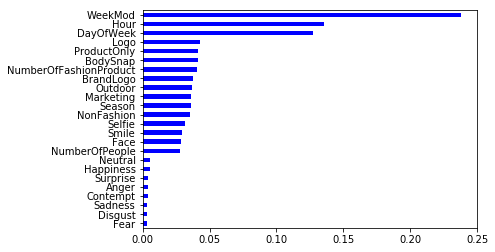

In [71]:
X = dfA.drop("BrandCat", axis=1)

import pandas as pd
import matplotlib.pyplot as plt
# Create a pd.Series of features importances
importances = pd.Series(random_forest.feature_importances_,
index = X.columns)
# Sort importances
sorted_importances = importances.sort_values()
# Make a horizontal bar plot
sorted_importances.plot(kind='barh', color='blue')
plt.show()

In [49]:
from sklearn.model_selection import cross_val_score

Y = dfA["BrandCat"]

CVrf = cross_val_score(RandomForestClassifier(n_estimators=500, min_samples_leaf = 3, max_features = .5, n_jobs = -1), X, Y, scoring='accuracy', cv=20)
#print('RFCV', round(scores.mean()*100,2))


In [ ]:

pdf = pd.DataFrame({'PredictedY':random_forest_predictions})
pdf = pd.concat([pdf, test_X])
zdf = pdf.loc[(pdf['PredictedY'] == 3) & (pdf['Sadness'] > 0 )]
zdf

In [73]:
CVrf = CVrf.mean()
CVrf

0.7045701175824897

## Linear SVC

In [53]:
linear_svc = LinearSVC()
linear_svc.fit(train_X, train_Y)
Y_pred5 = linear_svc.predict(test_X)
acc_linear_svc = round(linear_svc.score(test_X, test_Y) * 100, 2)
acc_linear_svc

53.73

In [54]:
print(classification_report(test_Y, Y_pred5))

              precision    recall  f1-score   support

           0       0.82      0.02      0.04      1445
           1       0.63      0.54      0.58      2753
           2       0.76      0.89      0.82      1544
           3       0.22      0.98      0.36       446

   micro avg       0.54      0.54      0.54      6188
   macro avg       0.61      0.61      0.45      6188
weighted avg       0.68      0.54      0.50      6188



In [55]:
#cm = pd.DataFrame(confusion_matrix(test_Y, Y_pred5), ['Actual: NOT', 'Actual: SURVIVED'], ['Predicted: NO', 'Predicted: SURVIVED'])
#print(cm)

In [56]:
from sklearn.model_selection import cross_val_score

Y = dfA["BrandCat"]

CVLSVC = cross_val_score(linear_svc, X, Y, scoring='accuracy', cv=3)
#print('RFCV', round(scores.mean()*100,2))

In [57]:
CVLSVC = CVLSVC.mean()
CVLSVC

0.4573723566249015

## Initial Model Comparison based on Cross Validated Scores

In [74]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'Linear SVC', 
              'KNN', 'Decision Tree', 'Random Forest'],
    
    'Score': [ CVSVC, CVLSVC, 
              CVKNN, CVDT, CVrf,]
    })

models.sort_values(by='Score', ascending=False)

,Model,Score
4,Random Forest,0.704570
0,Support Vector Machines,0.686292
2,KNN,0.618176
3,Decision Tree,0.598054
1,Linear SVC,0.457372


## Ensemble

## Hard Voting

In [59]:
# Define the list classifiers
from sklearn.metrics import accuracy_score
#classifiers = [('Logistic Regression', logreg), ('Linear SVC', linear_svc), ('Random Forest', random_forest), ('Decision Tree', decision_tree), ('KNN', knn), ("SVC", svc)]#('Support Vectors', svm),
classifiers = [('Random Forest', random_forest), ('Support Vectors', svc), ('KNN', knn)]
 #('Decision Tree', decision_tree)

# Import VotingCLassifier from sklearn.ensemble
from sklearn.ensemble import VotingClassifier

# Instantiate a VotingClassifier vc 
vcH = VotingClassifier(estimators=classifiers, voting='hard')     

# Fit vc to the training set
vcH.fit(train_X, train_Y)   

# Evaluate the test set predictions
y_pred = vcH.predict(test_X)

# Calculate accuracy score
accuracy = accuracy_score(test_Y, y_pred)
print('Hard Voting Classifier: {:.3f}'.format(accuracy))

Hard Voting Classifier: 0.756


In [60]:
print(classification_report(test_Y, y_pred))
#cm = pd.DataFrame(confusion_matrix(test_Y, y_pred), ['Actual: NOT', 'Actual: SURVIVED'], ['Predicted: NO', 'Predicted: SURVIVED'])
#print(cm)

              precision    recall  f1-score   support

           0       0.71      0.67      0.69      1445
           1       0.74      0.75      0.75      2753
           2       0.88      0.80      0.84      1544
           3       0.64      0.90      0.75       446

   micro avg       0.76      0.76      0.76      6188
   macro avg       0.74      0.78      0.76      6188
weighted avg       0.76      0.76      0.76      6188



In [61]:
CVHard = cross_val_score(vcH, X, Y, scoring='accuracy', cv=3)

In [62]:
CVHard = CVHard.mean()
CVHard

0.6710196095712334

## ..................................................................................................................................................................................................................................

# Hyperparameter Tuning


## Randomized Search

#### Randomized Search, look or parameters:

In [29]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)


{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


#### Randomized Search Training

In [30]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune

rf = random_forest = RandomForestClassifier()

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(train_X, train_Y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed: 13.0min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 27.2min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

### Identify best parameters based on randomized search

In [31]:
rf_random.best_params_

{'n_estimators': 1400,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 80,
 'bootstrap': False}

### Evaluate Randomized Search

In [36]:
def evaluate(model, test_X, test_Y):
    predictions = model.predict(test_X)
    errors = abs(predictions - test_Y)
    mape = 100 * np.mean(errors / test_Y)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy


In [41]:
#Make sure to inpt best parameters found above

base_model =  RandomForestClassifier(n_estimators= 1400, min_samples_split= 5, min_samples_leaf= 1, max_features= 'sqrt', max_depth= 80, bootstrap= False)

base_model.fit(train_X, train_Y)
base_accuracy = evaluate(base_model, test_X, test_Y)

Model Performance
Average Error: 0.2796 degrees.
Accuracy = -inf%.


In [71]:
acc_randomizd = round(base_model.score(test_X, test_Y) * 100, 2)

In [72]:
acc_randomizd

77.0

## Grid Search with Cross Validation

In [44]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [False],
    'max_depth': [80, 90, 100, 110],
    'max_features': ['sqrt'],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [4, 5, 6],
    'n_estimators': [1300, 1400, 1500]
}


# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

#### Fit Grid Search to the Data 

In [45]:
# Fit the grid search to the data
grid_search.fit(train_X, train_Y)
grid_search.best_params_

Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed: 20.2min
[Parallel(n_jobs=-1)]: Done 324 out of 324 | elapsed: 46.1min finished


{'bootstrap': False,
 'max_depth': 100,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 1300}

In [46]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, test_X, test_Y)

Model Performance
Average Error: 0.2823 degrees.
Accuracy = -inf%.


In [47]:
print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))

Improvement of nan%.


The models are as follows:

-best_random: best model from random search with cross validation
-first_grid: best model from first grid search with cross validation (selected as the final model)
-second_grid: best model from second grid search

In [73]:
best_acc_grid = round(best_grid.score(test_X, test_Y) * 100, 2)

In [74]:
best_acc_grid

76.78